# Association Rules

## Step 1: Read the data

In [2]:
# %load HW5.py
#!/usr/bin/env python3
"""
Created on Sun Feb 25 01:39:09 2018

@author: Yangfan Cui
"""

import pandas as pd
df = pd.read_excel('data_akbilgic.xlsx')
print(df.head())

        date       ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
0 2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1 2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2 2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3 2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4 2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802  


## Step2: Build the correlation matrix between all the exchange returns

In [3]:
# Step2: Build the correlation matrix between all the exchange returns
cov_mat = df.corr()
print(cov_mat)

              ISE     ISE.1        SP       DAX      FTSE    NIKKEI   BOVESPA  \
ISE      1.000000  0.942897  0.439489  0.602081  0.622948  0.260052  0.432898   
ISE.1    0.942897  1.000000  0.449561  0.629218  0.648740  0.393225  0.446889   
SP       0.439489  0.449561  1.000000  0.685843  0.657673  0.131250  0.722069   
DAX      0.602081  0.629218  0.685843  1.000000  0.867369  0.258538  0.585791   
FTSE     0.622948  0.648740  0.657673  0.867369  1.000000  0.255236  0.596287   
NIKKEI   0.260052  0.393225  0.131250  0.258538  0.255236  1.000000  0.172752   
BOVESPA  0.432898  0.446889  0.722069  0.585791  0.596287  0.172752  1.000000   
EU       0.655519  0.690761  0.687550  0.936393  0.948963  0.283750  0.621704   
EM       0.600295  0.701954  0.528243  0.665162  0.687543  0.547288  0.688074   

               EU        EM  
ISE      0.655519  0.600295  
ISE.1    0.690761  0.701954  
SP       0.687550  0.528243  
DAX      0.936393  0.665162  
FTSE     0.948963  0.687543  
NIKKEI   

## Step 3: Association Rules methodology

### Classify returns into two categories: 0 for negtive returns and 1 for positive returns

In [4]:
# step 3
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
def encode_units(x):
    if x <= 0:
        return 0
    if x > 0:
        return 1
col_names = df.columns
returns = df[col_names[1:len(col_names)]]
return_sets = returns.applymap(encode_units)

### Applying Association Rules to classified returns

In [5]:
frequent_itemsets = apriori(return_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedants,consequents,support,confidence,lift
0,(ISE),(ISE.1),0.570896,0.869281,1.584812
1,(ISE.1),(ISE),0.548507,0.904762,1.584812
2,(ISE),(SP),0.570896,0.643791,1.173714
3,(SP),(ISE),0.548507,0.670068,1.173714
4,(ISE),(DAX),0.570896,0.669935,1.255542


In [6]:
rules[(rules['lift']>=2)&rules['confidence']>=0.8]

,antecedants,consequents,support,confidence,lift
624,"(ISE, BOVESPA)","(SP, ISE.1)",0.337687,0.718232,2.036891
625,"(SP, ISE.1)","(ISE, BOVESPA)",0.352612,0.687831,2.036891
665,"(ISE, DAX)","(ISE.1, FTSE)",0.382463,0.804878,2.074109
666,"(ISE, FTSE)","(DAX, ISE.1)",0.395522,0.778302,2.106918
667,"(DAX, ISE.1)","(ISE, FTSE)",0.369403,0.833333,2.106918
668,"(ISE.1, FTSE)","(ISE, DAX)",0.388060,0.793269,2.074109
707,"(ISE, DAX)","(ISE.1, EU)",0.382463,0.809756,2.106938
708,"(ISE, EU)","(DAX, ISE.1)",0.389925,0.794258,2.150114
709,"(DAX, ISE.1)","(ISE, EU)",0.369403,0.838384,2.150114
710,"(ISE.1, EU)","(ISE, DAX)",0.384328,0.805825,2.106938


# Apriori Algorithm

The Apriori algorithm principle says that if an itemset is frequent, then all of its subsets are frequent.this means that if {0,1} is frequent, then {0} and {1} have to be frequent.
The rule turned around says that if an itemset is infrequent, then its supersets are also infrequent.
We first need to find the frequent itemsets, and then we can find association rules.

## Metrics

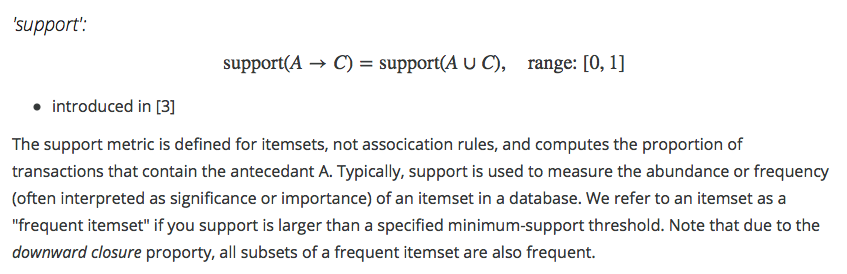
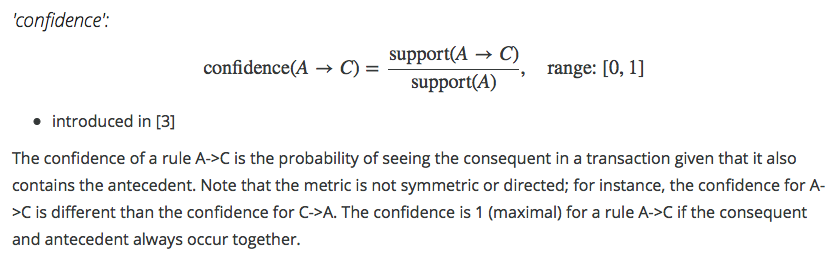
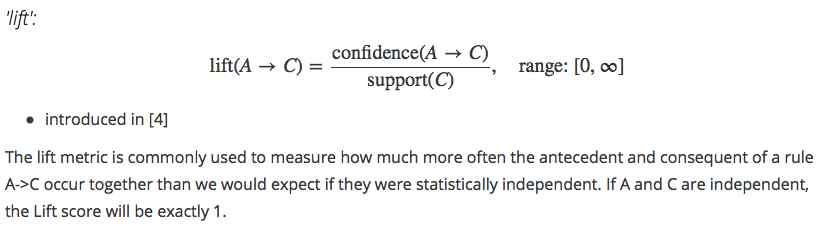
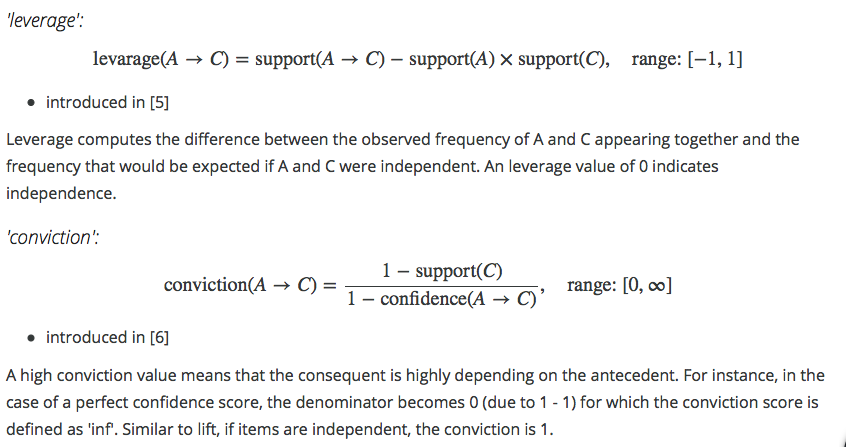